<a href="https://colab.research.google.com/github/bishalnstu/Signal-classification/blob/master/Predict_class_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import signal

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#train_path = '/content/drive/MyDrive/Colab Notebooks/../TimeSeriesTrain.csv'
#test_path = '/content/drive/MyDrive/Colab Notebooks/.../TimeSeriesTest.csv'
train_path='TimeSeriesTrain.csv'
test_path='TimeSeriesTest.csv'

In [4]:
data=pd.read_csv(train_path, header= None)


In [11]:
num_of_columns=len(data.columns)
X_train_temp=data.drop(data.columns[num_of_columns-1], axis=1)
sample=X_train_temp.iloc[500]

In [7]:
import numpy.fft as fft
spectrum = fft.fft(data)

In [12]:
freq = fft.fftfreq(len(spectrum))
freq=np.array(freq)
print("Maximum frequency: ",freq.max())
print("Minimum frequency: ",freq.min())

Maximum frequency:  0.49996666666666667
Minimum frequency:  -0.5


Here we can see one of the 30,000 singals. We can see the periodic characteristic of the signals.

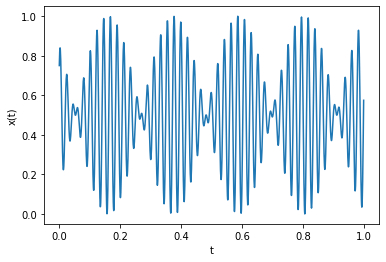

In [13]:
t = np.linspace(0.00, 1,1500)
plt.plot(t,sample)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

The below code snippet shows the increasing variation in signal amplitude

In [14]:
print(data.nunique(),10)

0        2192
1       11311
2       13044
3       16911
4       21178
        ...  
1496    25534
1497    25628
1498    25527
1499    25578
1500        3
Length: 1501, dtype: int64 10


In [12]:
cols = [num_of_columns-1]
X_train=data.drop(data.columns[num_of_columns-1], axis=1)
Y_train = data[data.columns[cols]]

The below histogram illustrate that the given train dataset is balanced

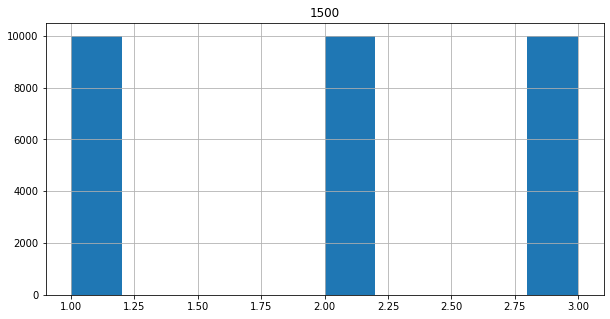

In [13]:
Y_train.hist(bins=10, figsize=(10,5))
plt.show()

In [14]:
test_data=pd.read_csv(test_path, header= None)

In [15]:
X_test=test_data.drop(test_data.columns[num_of_columns-1], axis=1)
Y_test = test_data[test_data.columns[cols]]

The below histogram illustrate that the given test dataset is balanced

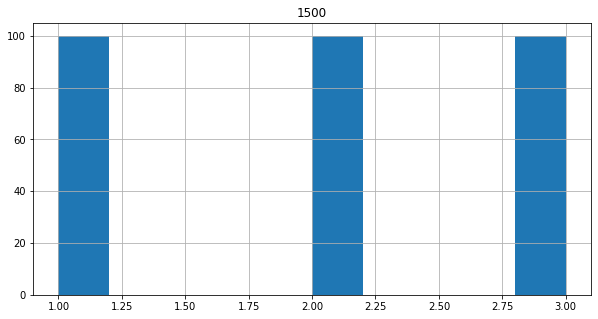

In [21]:
Y_test.hist(bins=10, figsize=(10,5))
plt.show()

In [16]:
accuracy_list = []

From here we start exploring different types of Machine learning algorithms on the dataset.

In [17]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [24]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, Y_train.values.ravel())
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(Y_test, r_pred)
r_acc=r_acc*100
print(r_acc)

100.0


In [34]:
sv_clf = SVC()
#sv_clf.fit(X_train, Y_train.values.ravel())
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(Y_test, sv_clf_pred)
r_acc=r_acc*100
print(r_acc)

9566.666666666668


In [19]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(X_train, Y_train.values.ravel())
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
print(dt_acc*100)

100.0


In [20]:
from sklearn.decomposition import PCA

Here again we will see the accuracy and training time after dimentionality reduction using PCA

In [22]:
pca = PCA(n_components=50)

In [23]:
classifier = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10, random_state=30, criterion='entropy')
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
X_transformed=pca.transform(X_train)

Here we can see that the shape of the dataset is reduced to (30000,50) from (30000,1500)

In [26]:
X_transformed.shape

(30000, 50)

In [27]:
classifier.fit(X_transformed, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

In [28]:
X_test_transformed=pca.transform(X_test)

In [29]:
pred_labels = classifier.predict(X_test_transformed)

In [30]:
dt_acc = accuracy_score(Y_test, pred_labels)
print(dt_acc*100)

91.33333333333333


<Figure size 432x288 with 0 Axes>

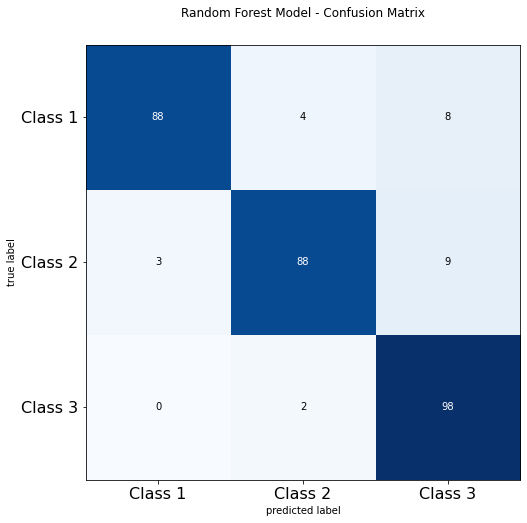

In [31]:
cm = confusion_matrix(Y_test, pred_labels)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(3), ["Class 1","Class 2","Class 3"], fontsize=16)
plt.yticks(range(3), ["Class 1","Class 2","Class 3"], fontsize=16)
plt.show()

In [32]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=10, random_state=1)
r_clf.fit(X_transformed, Y_train)
r_pred = r_clf.predict(X_test_transformed)
r_acc = accuracy_score(Y_test, r_pred)
print(r_acc*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


95.66666666666667


In [33]:
sv_clf = SVC()
sv_clf.fit(X_transformed, Y_train.values.ravel())
sv_clf_pred = sv_clf.predict(X_test_transformed)
sv_clf_acc = accuracy_score(Y_test, sv_clf_pred)
r_acc=r_acc*100
print(r_acc)

95.66666666666667
